In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/samet/Desktop/GlobalLandTemperaturesByCity.csv') #open dataset 
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [3]:
print(df.Country.unique()) #Countries are show belown.

['Denmark' 'Turkey' 'Kazakhstan' 'China' 'Spain' 'Germany' 'Nigeria'
 'Iran' 'Russia' 'Canada' "Côte D'Ivoire" 'United Kingdom' 'Saudi Arabia'
 'Japan' 'United States' 'India' 'Benin' 'United Arab Emirates' 'Mexico'
 'Venezuela' 'Ghana' 'Ethiopia' 'Australia' 'Yemen' 'Indonesia' 'Morocco'
 'Pakistan' 'France' 'Libya' 'Burma' 'Brazil' 'South Africa' 'Syria'
 'Egypt' 'Algeria' 'Netherlands' 'Malaysia' 'Portugal' 'Ecuador' 'Italy'
 'Uzbekistan' 'Philippines' 'Madagascar' 'Chile' 'Belgium' 'El Salvador'
 'Romania' 'Peru' 'Colombia' 'Tanzania' 'Tunisia' 'Turkmenistan' 'Israel'
 'Eritrea' 'Paraguay' 'Greece' 'New Zealand' 'Vietnam' 'Cameroon' 'Iraq'
 'Afghanistan' 'Argentina' 'Azerbaijan' 'Moldova' 'Mali'
 'Congo (Democratic Republic Of The)' 'Thailand'
 'Central African Republic' 'Bosnia And Herzegovina' 'Bangladesh'
 'Switzerland' 'Equatorial Guinea' 'Cuba' 'Lebanon' 'Mozambique' 'Serbia'
 'Angola' 'Somalia' 'Norway' 'Nepal' 'Poland' 'Ukraine' 'Guinea Bissau'
 'Malawi' 'Burkina Faso' 'Slov

In [4]:
df.shape #dataset shape

(8599212, 7)

In [5]:
df.isnull().sum() #NaN values detected.

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [6]:
df1= df.dropna().copy() #NaN values drop from dataset, afterall new dataset df1 created.

In [7]:
df1.shape

(8235082, 7)

In [8]:
df1.rename(columns={'dt':'Date2','AverageTemperature':'Temperature', 'AverageTemperatureUncertainty':'Temperature_Accuarcy_Range'},inplace=True)
#Some columns are renamed here.

In [9]:
df1['Date2']=pd.to_datetime(df1['Date2'])
df1.set_index('Date2',inplace=True)
df1.index
#Date2 convert date time format.

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date2', length=8235082, freq=None)

In [10]:
df1.describe()
pd.set_option('float_format', '{:f}'.format) #Values are arranged as float form.

In [11]:
df1['Year']= df1.index.year #Year column inserted as a new column.
df1.head()

Temperature  Temperature_Accuarcy_Range   City  Country Latitude  \
Date2                                                                          
1743-11-01     6.068000                    1.737000  Århus  Denmark   57.05N   
1744-04-01     5.788000                    3.624000  Århus  Denmark   57.05N   
1744-05-01    10.644000                    1.283000  Århus  Denmark   57.05N   
1744-06-01    14.051000                    1.347000  Århus  Denmark   57.05N   
1744-07-01    16.082000                    1.396000  Århus  Denmark   57.05N   

           Longitude  Year  
Date2                       
1743-11-01    10.33E  1743  
1744-04-01    10.33E  1744  
1744-05-01    10.33E  1744  
1744-06-01    10.33E  1744  
1744-07-01    10.33E  1744

In [12]:
df1.describe() #dataset's values criteria display.

Temperature  Temperature_Accuarcy_Range           Year
count 8235082.000000              8235082.000000 8235082.000000
mean       16.727433                    1.028575    1910.833898
std        10.353442                    1.129733      64.196090
min       -42.704000                    0.034000    1743.000000
25%        10.299000                    0.337000    1865.000000
50%        18.831000                    0.591000    1915.000000
75%        25.210000                    1.349000    1964.000000
max        39.651000                   15.396000    2013.000000

In [13]:
df1[['Country','Temperature']].groupby(['Country']).mean().sort_values('Temperature')
#Countries are listed according to their temperature values.

Temperature
Country                  
Mongolia        -3.365485
Iceland          1.500089
Russia           3.347268
Norway           3.612553
Finland          3.711645
...                   ...
Mali            27.590491
Burkina Faso    27.815295
Sudan           28.072831
Niger           28.145552
Djibouti        29.152790

[159 rows x 1 columns]

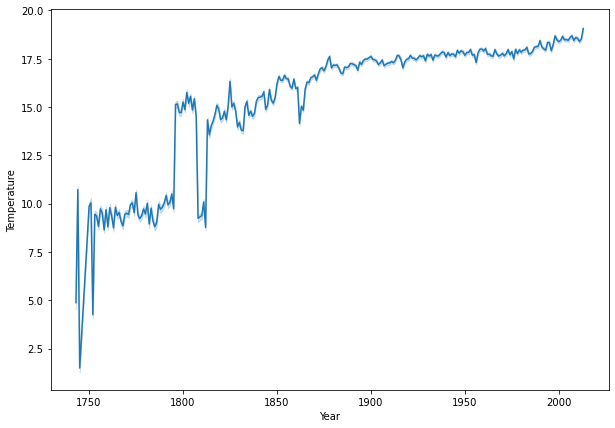

In [14]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y= 'Temperature',data=df1)
plt.show()
#Temperature values have been plotted since 1740.
#In general, we can say that the temperature values increase.
#It can be deduced that this upward trend will increase.

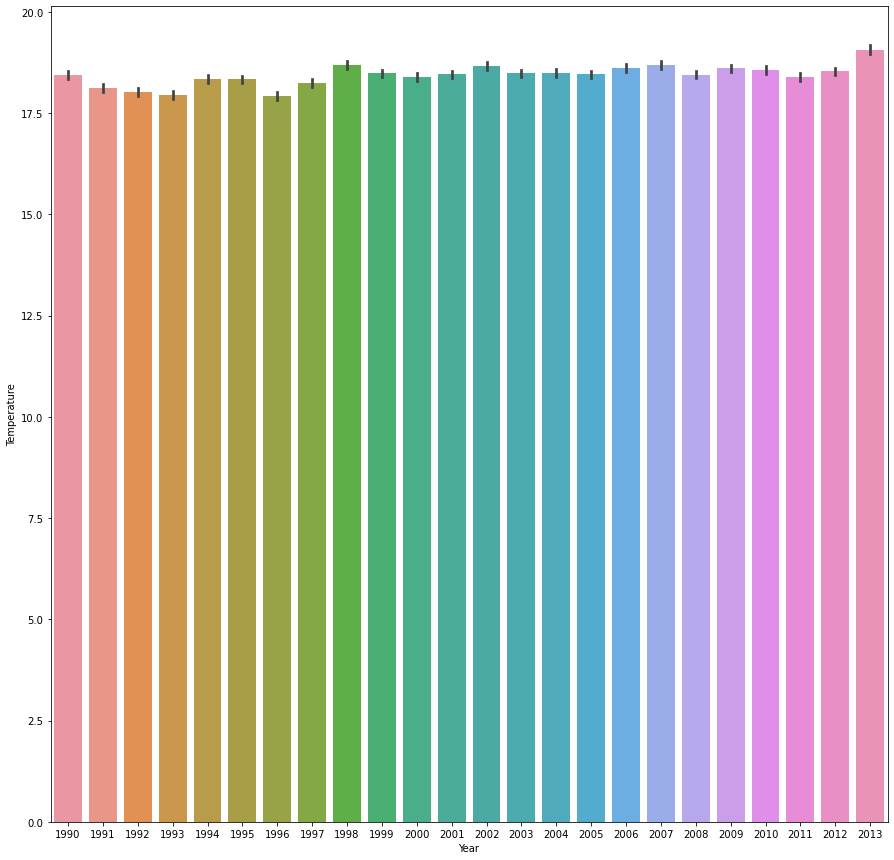

In [15]:
df2 = df1[df1['Year'] >= 1990]
plt.figure(figsize=(15,15))
sns.barplot(x='Year', y= 'Temperature',data=df2)
plt.show()

In [16]:
year_df=df1[['Temperature']].resample('Y').mean()
year_by_year= year_df.dropna().copy()
year_by_year.head()
#year_by_year.shape
#A new dataset is created in which the temperature values are kept according to the years.

Temperature
Date2                  
1743-12-31     4.882424
1744-12-31    10.734047
1745-12-31     1.497593
1750-12-31     9.872808
1751-12-31    10.046739

In [17]:
year_by_year.isnull().sum()
year_by_year.shape
#Year by year dataset's shape. 267 year included.

(267, 1)

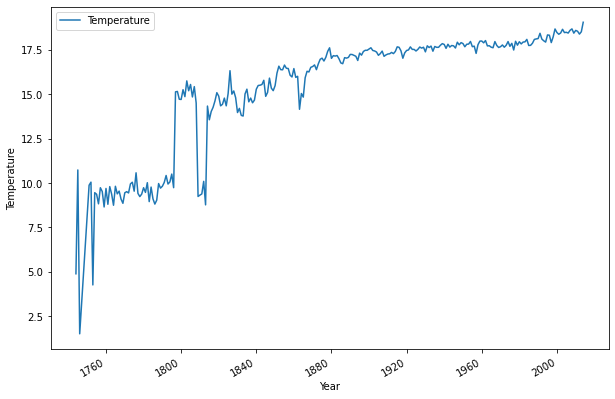

In [18]:
year_by_year.plot(figsize=(10,7))
plt.ylabel("Temperature")
plt.xlabel("Year")
plt.legend()
plt.show()
#Temperature values have been plotted again here. Based on years.

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
decomp = seasonal_decompose(year_by_year, period=3)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

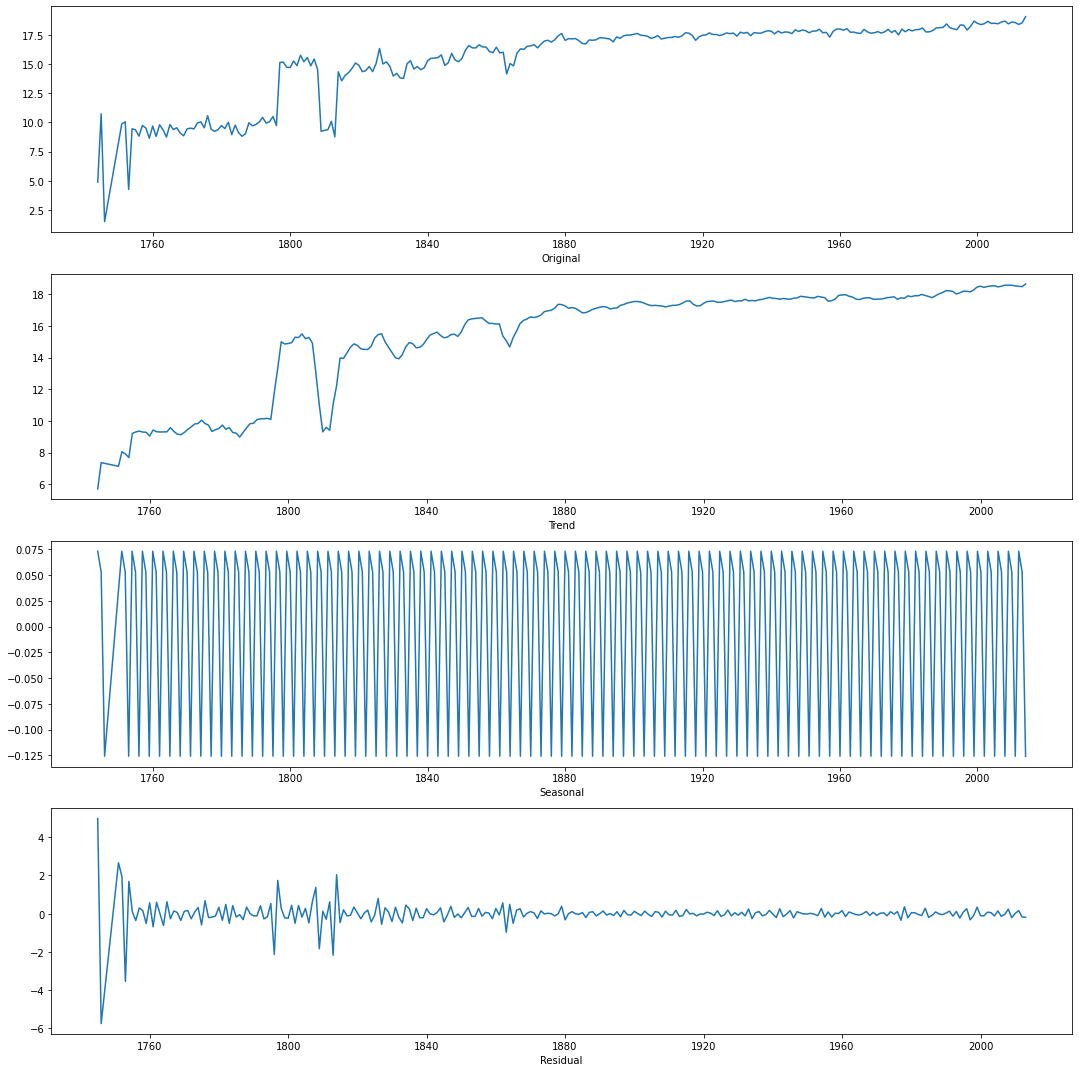

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(year_by_year)
plt.xlabel("Original")


plt.subplot(412)
plt.plot(trend)
plt.xlabel("Trend")

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel("Seasonal")

plt.subplot(414)
plt.plot(residual)
plt.xlabel("Residual")

plt.tight_layout()

#Time series decomposition is a technique that splits a time series as a trend,seasonal and residual.

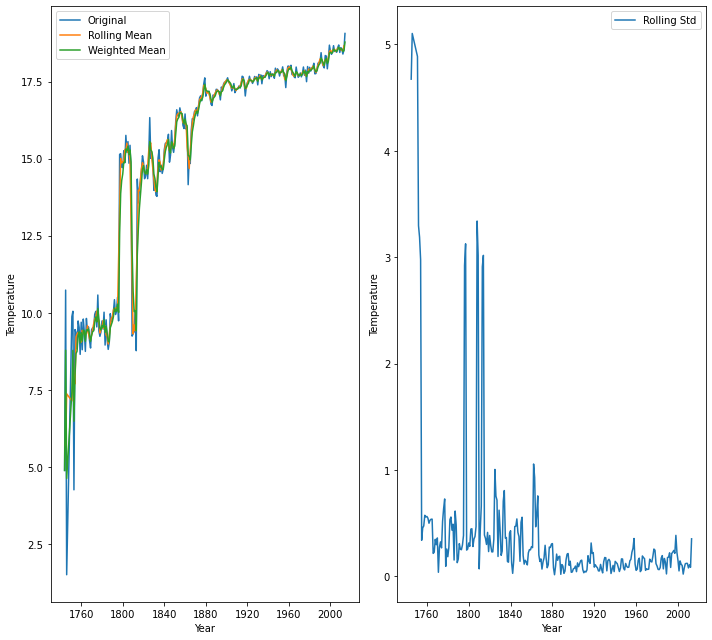

In [22]:
rol_mean= year_by_year.rolling(window=3, center=True).mean()
ewm=year_by_year.ewm(span=3).mean()

rol_std=year_by_year.rolling(window=3,center=True).std()

fig,(x,y)= plt.subplots(1,2,figsize=(10,9))

x.plot(year_by_year, label="Original")
x.plot(rol_mean,label="Rolling Mean")
x.set_title=("Temperature Changes")
x.set_ylabel("Temperature")
x.set_xlabel("Year")
x.plot(ewm,label="Weighted Mean")
x.legend()

y.plot(rol_std,label="Rolling Std")
y.set_title=("Temperature Changes")
y.set_ylabel("Temperature")
y.set_xlabel("Year")
y.legend()

plt.tight_layout()
plt.show()

#The Rolling Standard Deviation shows when the upward trend is in the time series.
#We can see the graph of the time that the increase and decrease in temperature occur over the years.

In [23]:
from statsmodels.tsa.stattools import adfuller
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)


print('Dickey Fuller Test Results')
df_test = adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])
for key,value in df_test[4].items():
    df_output['Critical value (%s)'%key] = value
print(df_output)
df_test = adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])
for key,value in df_test[4].items():
    df_output['Critical value (%s)'%key] = value
print(df_output)

#Here, Dickey Fuller test was used. According to the results we obtained with this test, 
#the time series is not stationary because the statistical result is greater than the critical value.

Dickey Fuller Test Results
Test Statistic                -2.198097
p-value                        0.206937
Lags Used                     12.000000
Number of Observation Used   252.000000
Critical value (1%)           -3.456569
Critical value (5%)           -2.873079
Critical value (10%)          -2.572919
dtype: float64
Test Statistic                -2.548632
p-value                        0.104085
Lags Used                     12.000000
Number of Observation Used   254.000000
Critical value (1%)           -3.456360
Critical value (5%)           -2.872987
Critical value (10%)          -2.572870
dtype: float64


In [24]:
diff_rol_mean = year_by_year - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

Temperature
Date2                  
1744-12-31     5.029359
1745-12-31    -5.870557
1750-12-31     2.733762
1751-12-31     1.989202
1752-12-31    -3.664426

In [25]:
diff_ewm = year_by_year - ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

Temperature
Date2                  
1743-12-31     0.000000
1744-12-31     1.950541
1745-12-31    -3.122534
1750-12-31     2.451251
1751-12-31     1.270249

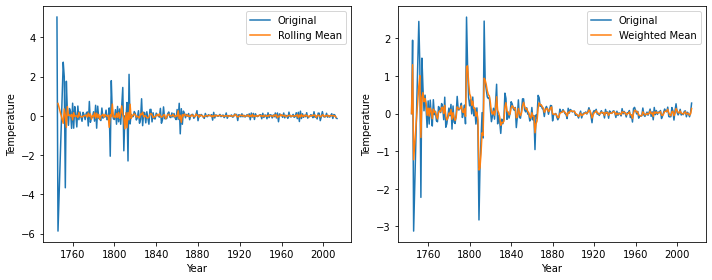

In [26]:
df_rol_mean =diff_rol_mean.rolling(window=3, center=True).mean()
df_ewm =diff_ewm.ewm(span=3).mean()

fig,(x,y)= plt.subplots(1,2,figsize=(10,4))

x.plot(diff_rol_mean, label="Original")
x.plot(df_rol_mean,label="Rolling Mean")
x.set_title=("Temperature Changes")
x.set_ylabel("Temperature")
x.set_xlabel("Year")
x.legend()

y.plot(diff_ewm,label="Original")
y.plot(df_ewm,label="Weighted Mean")
y.set_title=("Temperature Changes")
y.set_ylabel("Temperature")
y.set_xlabel("Year")
y.legend()

plt.tight_layout()
plt.show()

#Temperature changes were estimated with the help of time series. 
#The blue values show the original values, while the orange value shows the predicted values. 
#A result quite close to the original was obtained. In addition, the fluctuations in the graph decreased.
#Closer results were obtained.

In [27]:
print('Dickey Fuller Test Results')
dftest = adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])
for key,value in df_test[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)
print('')
dftest = adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Dickey Fuller Test Results
Test Statistic                -7.657182
p-value                        0.000000
Lags Used                     15.000000
Number of Observation Used   249.000000
Critical value (1%)           -3.456360
Critical value (5%)           -2.872987
Critical value (10%)          -2.572870
dtype: float64

Test Statistic                -7.983965
p-value                        0.000000
Lags Used                     11.000000
Number of Observation Used   255.000000
Critical value (1%)           -3.456257
Critical value (5%)           -2.872942
Critical value (10%)          -2.572846
dtype: float64


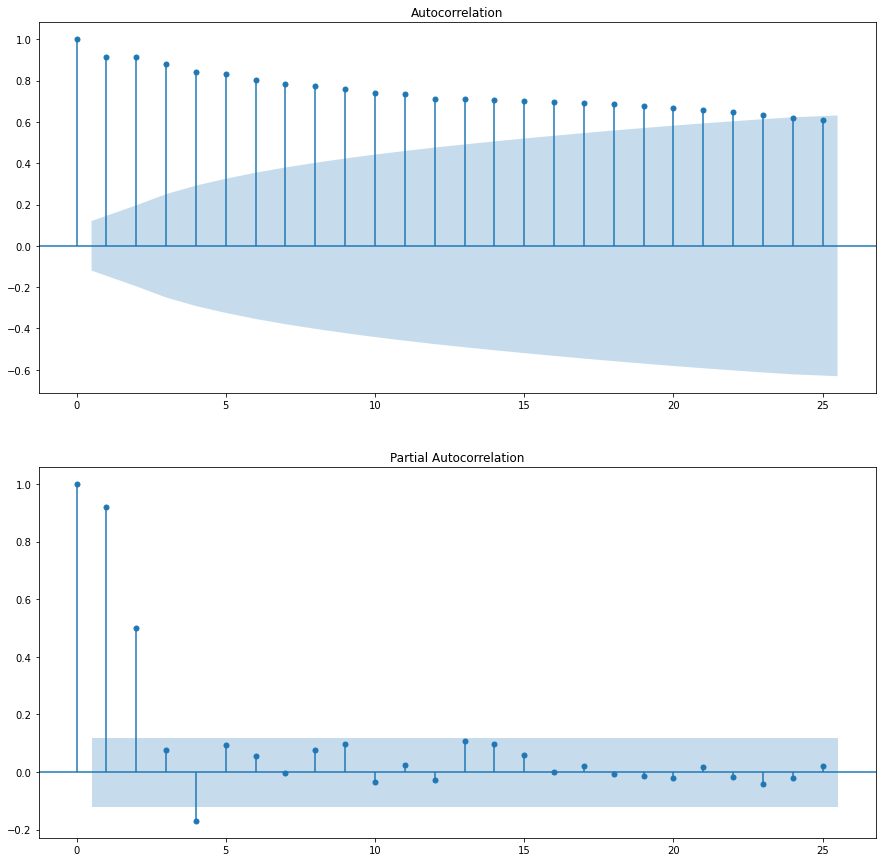

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(15,15))
pyplot.subplot(211)
plot_acf(year_by_year, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(year_by_year, ax=pyplot.gca())
pyplot.show()
#The correlation graph of the time series is shown. It is not stationary as it does not fall from 1 to 0 quickly.

In [29]:
df['Date2'] = pd.to_datetime(df['dt'])
df['year'] = df['Date2'].dt.year
#Date2 convert to datetime version , and year column used belown operations.
# Group by year
by_year = df.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()
world_map=pd.read_csv('C:/Users/samet/Desktop/continents2.csv') #Open new dataset.

In [30]:
world_map.head() #The content of the new dataset is displayed with the Head function.

name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN   142.000000        34.000000   
1  Northern Europe                 NaN   150.000000       154.000000   
2  Southern Europe                 NaN   150.000000        39.000000   
3  Northern Africa                 NaN     2.000000        15.000000   
4        Polynesia                 NaN     9.000000        61.000000   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [31]:
world_map['Country'] = world_map['name'] #Country column is synchronized to name column.

In [32]:
world_map = world_map[['Country', 'region', 'alpha-2', 'alpha-3']]

In [33]:
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots
#Importing necessary libraries.Plotly's Python graphing library makes interactive, publication-quality graphs.

data = pd.merge(left = by_year, right = world_map, on = 'Country', how = 'left')
data = data[data['year'] >= 1840]
#Year especially chosen 1840 which is represent Industrial Revolution.

#region,year,and cities assign here.

region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
df1 = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()

In [34]:
#Continents are determined.
continent = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
continent.update_layout(title="Max and Average Temperatures by each Continents", title_font_size = 20,
                  
                  template = "ggplot2", hovermode= 'closest') #ggplot2 is an open-source data visualization package for the statistical programming
continent.update_xaxes(showline=True, linewidth=1, linecolor='gray')
continent.update_yaxes(showline=True, linewidth=1, linecolor='gray')

continent.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
continent.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
continent.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
continent.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
continent.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)


leftside = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
rightside = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

continent.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Average Temperature', marker_color = 'rgb(0, 114, 122)', text = leftside, textposition = 'auto'),
              row = 1, col = 2)
continent.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Maximum Temperature', marker_color = 'rgb(255, 0, 0)', text = rightside, textposition = 'auto'),
              row = 1, col = 2)

In [36]:
#The temperature difference is calculated and visualized. Plotly was used.
meanvalue = df1.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maxvalue = df1.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

total = pd.merge(left = meanvalue, right = maxvalue, on = ['Country', 'region'])
total['diff'] = total['AverageTemperature_y'] - total['AverageTemperature_x']


rank = go.Figure()
rank.update_layout(title="Difference in Temperature (Countries)", title_font_size = 20,
    
                  template = "ggplot2", autosize = False, height = 3700, width = 700)
rank.update_xaxes(showline=True, linewidth=1)
rank.update_yaxes(showline=True, linewidth=1)

sort_diff = total[['Country', 'region', 'diff']].sort_values(by = 'diff', ascending = True)
rank.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(109, 178, 122)', line=dict( color='rgb(154, 117, 252)', width=0.6))))
rank.show()

In [37]:
#ISO 3166-1 alpha-3 codes are three-letter country codes defined in ISO 3166-1, 
#part of the ISO 3166 standard published by the International Organization for Standardization (ISO),
#to represent countries, dependent territories, and special areas of geographical interest.
world_map = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

#A world map was created according to the temperature values in the data. Since I got an error when the temperature values
#are negative in the visualization of the world map, I adapted it according to the positive values.
world_map['AverageTemperature'] = world_map['AverageTemperature'] + 6 #For positive numbers

wmap = px.scatter_geo(world_map, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(54, 172, 118)','rgb(195, 130, 145)','rgb(143, 1, 0)','rgb(0, 38, 91)'),
                     hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='World Map Temperature Relationship')
wmap.show()
#Temperature increase by country since 1840. Countries from the same continent are represented by the same colors.

In [38]:
meanvalue = world_map.groupby(['region','Country','alpha-3'])['AverageTemperature'].mean().reset_index()
maxvalue  = world_map.groupby(['region','Country','alpha-3'])['AverageTemperature'].max().reset_index()
total= pd.merge(left = meanvalue, right = maxvalue, on = ['region','Country','alpha-3'])
total['diff'] = total['AverageTemperature_y'] - total['AverageTemperature_x']
total.rename(columns = {'AverageTemperature_y':'Maximum Average Temperature',
                             'AverageTemperature_y':'Average Temperature Scala'}, inplace = True)


wmap2 = px.scatter_geo(total, locations="alpha-3", color="Average Temperature Scala",
                     hover_name="Country", size="diff", size_max=15, #we size by how big is the difference
                     projection="natural earth", opacity = 0.8,
                     color_continuous_scale=('#010030', '#2874A6', '#8098db', '#f6ab2b', '#e64f22', '#f92426'),
                     title = 'World Map -  Temperatures Relationship of Countries')
wmap2.show()
#Countries whose temperature values 
#are determined are represented by colors suitable for the scale. Here we can see the temperature values colors.

#Countries are represented by circles. The size of the circles is directly proportional to the temperature differences.
#Maximum temperature values are arranged according to the colors on the scale.